In [3]:
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit

#loading boston.csv

df_boston = pd.read_csv('boston.csv')
#preview dataset
df_boston

#get x,y variables
x = df_boston['crim'] #per capita crime rate by town
y = df_boston['medv'] #median value of owner-occupied homes in $1000s

#convert x and y to numpy arrays for easy manipulation. (for simplicity)

x = x.to_numpy()
y = y.to_numpy()




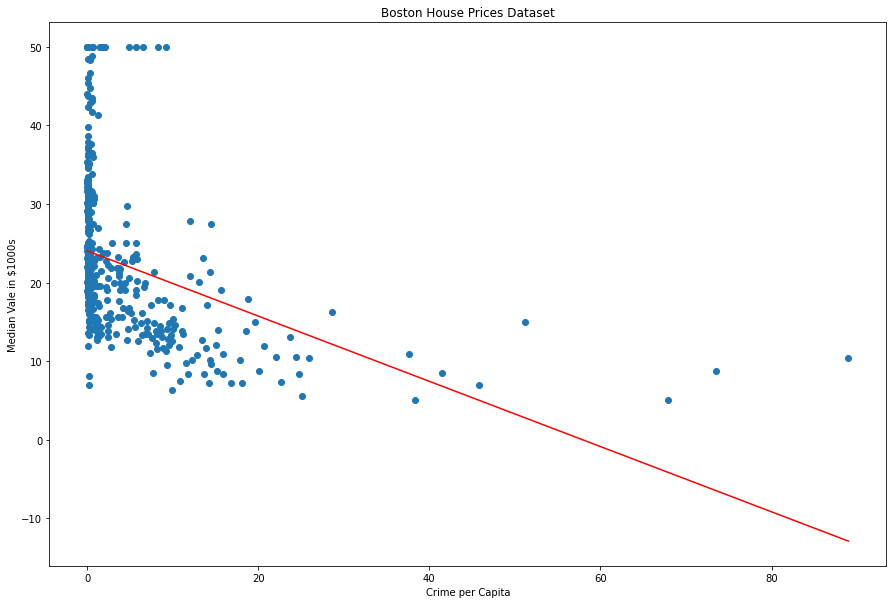

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,10] #change numbers to make the plots 

#generate an array of size 100 that covers the range of x values in equally spaces
#useful for plotting lines "manually"
x_range = np.linspace(min(x),max(x), 1000)


plt.scatter(x,y)
plt.plot(x_range, linear(x_range, m=popt[0], b=popt[1]), 'r-')
plt.title('Boston House Prices Dataset')
plt.xlabel('Crime per Capita')
plt.ylabel('Median Vale in $1000s')
plt.show()

In [6]:
#linear fitting
#low level btw
#find the line that minimizes the SSR

def linear(x,m,b):
    return m*x + b

#curve_fit() returns 2 objects 
#popt - optimal values for the parameters
#pcov - estimated covariance of popt (not important rn)

popt, pcov = curve_fit(linear,x,y)

print(popt) #prints out m and b respectively

#calculate SSR
ssr = sum((y - linear(x,m=popt[0],b=popt[1]))**2)

ssr

[-0.41519028 24.03310617]


36275.51235627509

[ 8.86841741e-03 -8.76140633e-01  2.49281142e+01]
ssr 33751.29099326468


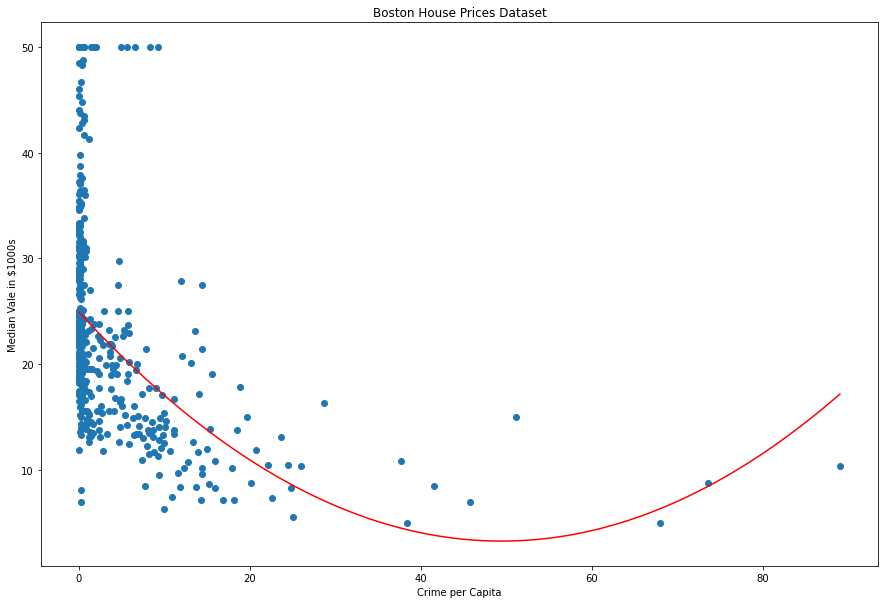

In [10]:
#quadratic fitting

def quadratic(x,a,b,c):
    return a*x**2 + b*x + c

popt, pcov = curve_fit(quadratic,x,y)

ssr_quad = sum((y - quadratic(x,a=popt[0],b=popt[1],c=popt[2]))**2)

print(popt) #prints a,b,c
print('ssr', ssr_quad)

x_range = np.linspace(min(x),max(x), 1000)


plt.scatter(x,y)
plt.plot(x_range, quadratic(x_range, a=popt[0], b=popt[1], c=popt[2]), 'r-')
plt.title('Boston House Prices Dataset')
plt.xlabel('Crime per Capita')
plt.ylabel('Median Vale in $1000s')
plt.show()


[-1.48872085e-04  2.37848249e-02 -1.13640071e+00  2.51904793e+01]
ssr 33416.74914905215


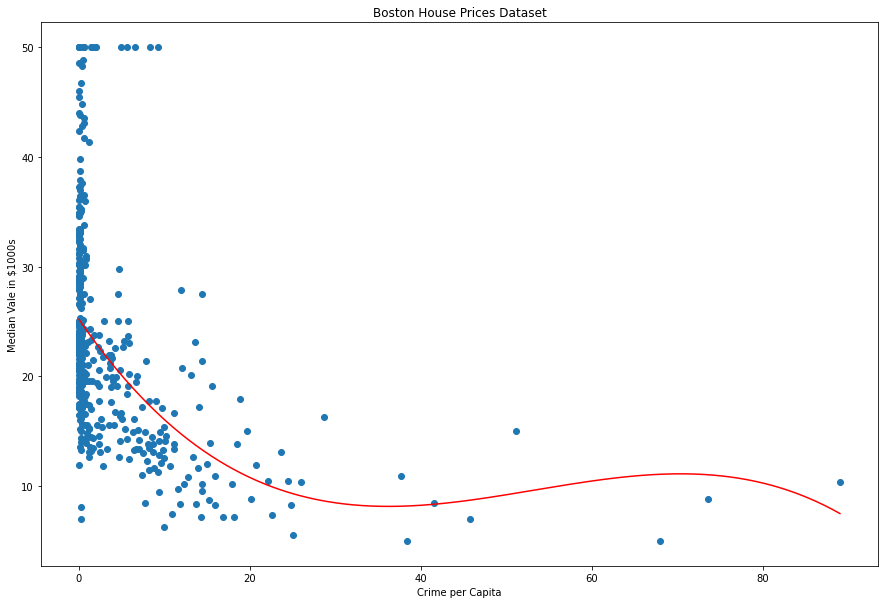

In [13]:
#cubic fitting

def cubic(x,a,b,c,d):
     return (a * x**3) + (b * x**2) + (c * x) + d

popt, pcov = curve_fit(cubic,x,y)

ssr_cubic = sum((y - cubic(x,a=popt[0],b=popt[1],c=popt[2],d=popt[3]))**2)

print(popt) #prints a,b,c
print('ssr', ssr_cubic)

x_range = np.linspace(min(x),max(x), 1000)


plt.scatter(x,y)
plt.plot(x_range, cubic(x_range, a=popt[0], b=popt[1], c=popt[2],d=popt[3]), 'r-')
plt.title('Boston House Prices Dataset')
plt.xlabel('Crime per Capita')
plt.ylabel('Median Vale in $1000s')
plt.show()


A = 16.898867896432087
b = 0.08328776746739697
c = 8.432307263980116
SSR: 33363.78224080041


C:\Users\JG\anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


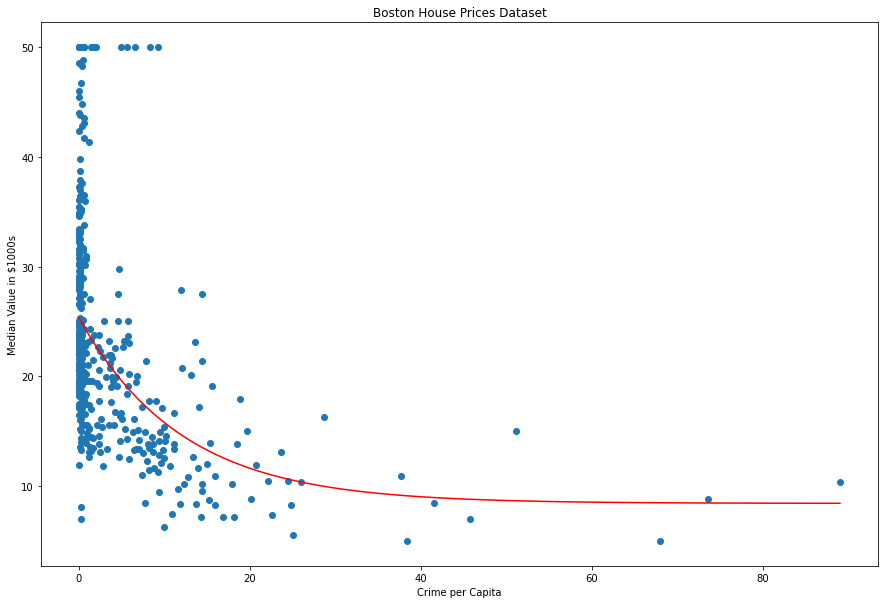

In [14]:
#exponential fitting adding a constant to better fit the original exponential fitting example

def exponential(x, A, b,c):
    return A * np.exp(-b * x) + c #-b because it can be seen in the graph that it has a decaying trend
    
popt, pcov = curve_fit(exponential, x, y) #add p0=[1,1e-6]in the argument to remove the "overflow warning below"
#popt, pcov = curve_fit(exponential, x, y, p0 = [1, 1e-6]) ## no overflow warning but we get the same answer anyway

ssr = sum((y - exponential(x, *popt))**2)

print('A =', popt[0])
print('b =', popt[1])
print('c =', popt[2])
print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, exponential(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()

A = -5.838795921913952
alpha = 0.31556717894113256
SSR: 33294.06802406733


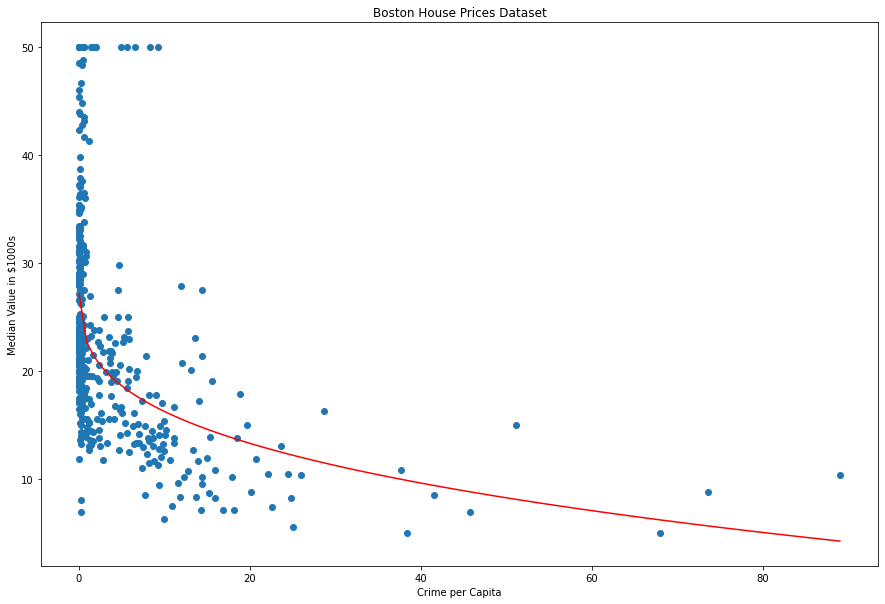

In [18]:
#try adding a constant term to the original power law fitting
def powerlaw(x, A, alpha, c):
    return A * (np.power(x, alpha)) +c

popt, pcov = curve_fit(powerlaw, x, y)

ssr = sum((y - powerlaw(x, *popt))**2)

print('A =', popt[0])
print('alpha =', popt[1])
print('SSR:', ssr)

x_range = np.linspace(min(x), max(x), 100)

plt.plot(x_range, powerlaw(x_range, *popt), 'r-')
plt.scatter(x, y)
plt.title("Boston House Prices Dataset")
plt.xlabel('Crime per Capita')
plt.ylabel('Median Value in $1000s')
plt.show()